In [146]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the dataset

In [9]:
data = pd.read_csv('Housing Pricing.csv')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [11]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


## Data Preprocessing

### Missing Data

In [12]:
len(data)

1460

In [13]:
data.drop('Id', axis=1, inplace=True)

In [14]:
data.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500


In [16]:
data.shape

(1460, 76)

**Total missing values per column**

In [17]:
data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 76, dtype: int64

**Convert into percentage of the total DataFrame**

In [23]:
100* data.isnull().sum()/len(data)

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 76, dtype: float64

**Print out all features with missing values**

In [19]:
initial_features = list(data.columns)
initial_features
len(initial_features)

76

In [22]:
features_missing = list(data.columns[data.isna().any()])
len(features_missing)

15

In [24]:
for f in features_missing:
    print(f, ' ', 100* data[f].isnull().sum()/len(data))

LotFrontage   17.73972602739726
MasVnrType   0.547945205479452
MasVnrArea   0.547945205479452
BsmtQual   2.5342465753424657
BsmtCond   2.5342465753424657
BsmtExposure   2.6027397260273974
BsmtFinType1   2.5342465753424657
BsmtFinType2   2.6027397260273974
Electrical   0.0684931506849315
FireplaceQu   47.26027397260274
GarageType   5.5479452054794525
GarageYrBlt   5.5479452054794525
GarageFinish   5.5479452054794525
GarageQual   5.5479452054794525
GarageCond   5.5479452054794525


**Drop features with more than 50% missing**

In [25]:
data.dropna(axis=1, thresh=0.5 * (len(data)), inplace=True)

In [26]:
mean_fill=['LotFrontage', 'MasVnrArea']
bfill = ['FireplaceQu']
ffill = list(set(features_with_missing)-set(mean_fill)-set(bfill))

In [27]:
ffill

['BsmtExposure',
 'BsmtFinType2',
 'BsmtFinType1',
 'Electrical',
 'GarageType',
 'GarageQual',
 'GarageFinish',
 'BsmtQual',
 'BsmtCond',
 'GarageCond',
 'MasVnrType',
 'GarageYrBlt']

In [28]:
for feature in mean_fill:
    data[feature].fillna(data[feature].mean(), inplace=True)

In [29]:
for feature in bfill:
    data[feature].fillna(method = 'bfill', inplace=True)

In [30]:
for feature in ffill:
    data[feature].fillna(method = 'ffill', inplace=True)

In [31]:
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

### Encode the Dataset

**List all non-numeric columns**

In [32]:
data.select_dtypes(['object']).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

**Extract Categorical Data**

In [36]:
categorical_features = list(data.select_dtypes(include=['object']).copy().columns)

In [37]:
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [38]:
len(categorical_features)

39

In [41]:
nominal=['MSZoning', 'LandContour', 'LotConfig','Neighborhood','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','Foundation','BsmtFinType1','CentralAir']
ordinal = list(set(categorical_features)-set(nominal))
numerical = list(set(initial_features)-set(categorical_features))
target = ['SalePrice']

In [42]:
data[numerical]

,WoodDeckSF,TotRmsAbvGrd,LotArea,YearBuilt,GarageArea,2ndFlrSF,KitchenAbvGr,OverallCond,BsmtFullBath,BsmtUnfSF,...,TotalBsmtSF,PoolArea,HalfBath,OpenPorchSF,OverallQual,Fireplaces,LotFrontage,EnclosedPorch,YearRemodAdd,FullBath
0,0,8,8450,2003,548,854,1,5,1,150,...,856,0,1,61,7,0,65.0,0,2003,2
1,298,6,9600,1976,460,0,1,8,0,284,...,1262,0,0,0,6,1,80.0,0,1976,2
2,0,6,11250,2001,608,866,1,5,1,434,...,920,0,1,42,7,1,68.0,0,2002,2
3,0,7,9550,1915,642,756,1,5,1,540,...,756,0,0,35,7,1,60.0,272,1970,1
4,192,9,14260,2000,836,1053,1,5,1,490,...,1145,0,1,84,8,1,84.0,0,2000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,7,7917,1999,460,694,1,5,0,953,...,953,0,1,40,6,1,62.0,0,2000,2
1456,349,7,13175,1978,500,0,1,6,1,589,...,1542,0,0,0,6,2,85.0,0,1988,2
1457,0,9,9042,1941,252,1152,1,9,0,877,...,1152,0,0,60,7,2,66.0,0,2006,2
1458,366,5,9717,1950,240,0,1,6,1,0,...,1078,0,0,0,5,0,68.0,112,1996,1


In [43]:
len(numerical)

37

**Integer Encoding for Ordinals**

In [44]:
for f in ordinal:
    data[f] = (data[f].astype('category')).cat.codes

In [45]:
df_ordinals = data[ordinal]

**One Hot Encoding for Nominals**

In [46]:
df_nominals = pd.get_dummies(data[nominal])

**Assemble the encoded data**

In [47]:
df_numerals = data[numerical]

In [49]:
enc_data = pd.concat([df_numerals, df_nominals, df_ordinals], axis=1)

In [64]:
enc_data.head(3)

,WoodDeckSF,TotRmsAbvGrd,LotArea,YearBuilt,GarageArea,2ndFlrSF,KitchenAbvGr,OverallCond,BsmtFullBath,BsmtUnfSF,...,LotShape,ExterQual,BsmtQual,ExterCond,FireplaceQu,HeatingQC,MasVnrType,BsmtCond,LandSlope,BldgType
0,0,8,8450,2003,548,854,1,5,1,150,...,3,2,2,4,4,0,1,3,0,0
1,298,6,9600,1976,460,0,1,8,0,284,...,3,3,2,4,4,0,2,3,0,0
2,0,6,11250,2001,608,866,1,5,1,434,...,0,2,2,4,4,0,1,3,0,0


### Standardize the dataset

In [52]:
scaler = StandardScaler()

**Separate the target from the features**

In [74]:
df_X = enc_data.drop('SalePrice', axis=1)
X = np.array(df_X)

In [75]:
df_y = data[target]
y = np.array(df_y)

In [62]:
X.shape

(1460, 162)

In [63]:
y.shape

(1460, 1)

In [120]:
X=scaler.fit_transform(X)
y=scaler.fit_transform(y)

### Feature Selection using L1

In [121]:
regressor = LassoCV()
regressor.fit(X,y)

/home/john/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LassoCV()

L1 selected only  77  features out of  162  from the transformed dataset 


Text(0.5, 1.0, 'Feature Selection Using L1 Embedder')

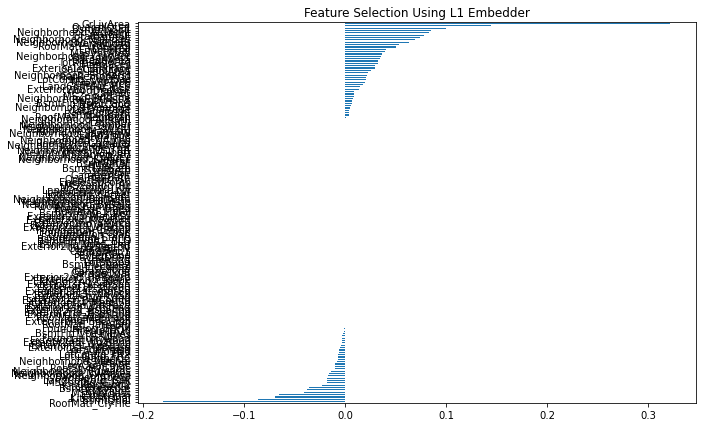

In [122]:
#print(regressor.coef_)
coef_col = pd.Series(regressor.coef_,index=df_X.columns)

#print(coef_col)
sorted_coef = coef_col.sort_values()
plt.rcParams['figure.figsize']=(10.0,7.0)
sorted_coef.plot(kind="barh")

no_of_selected_features = sum(coef_col != 0)
no_of_rejected_features = sum(coef_col == 0)
total_features = no_of_selected_features + no_of_rejected_features
print("L1 selected only ",no_of_selected_features," features out of ",total_features," from the transformed dataset ")
plt.title("Feature Selection Using L1 Embedder")

**Retrieve the selected features**

In [123]:
selected_features_list = []
for label, value in zip(coef_col.index, coef_col.values):
    if value != 0:
        selected_features_list.append(label)

selected_features_list

['WoodDeckSF',
 'TotRmsAbvGrd',
 'LotArea',
 'YearBuilt',
 'GarageArea',
 'KitchenAbvGr',
 'OverallCond',
 'BsmtFullBath',
 'ScreenPorch',
 'LowQualFinSF',
 'MasVnrArea',
 'MSSubClass',
 'GrLivArea',
 'BedroomAbvGr',
 'BsmtFinSF2',
 'BsmtFinSF1',
 'YrSold',
 'GarageCars',
 'MoSold',
 'TotalBsmtSF',
 'PoolArea',
 'OverallQual',
 'Fireplaces',
 'LotFrontage',
 'YearRemodAdd',
 'FullBath',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'Neighborhood_BrkSide',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Mitchel',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Veenker',
 'RoofStyle_Gable',
 'RoofMatl_ClyTile',
 'RoofMatl_Membran',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShngl',
 'Exterior1st_BrkFace',
 'Exterior1st_HdBoard',
 'Exterior1st_ImStucc',


In [124]:
standardized_df = pd.DataFrame(X, columns=df_X.columns)

In [184]:
X = standardized_df[selected_features_list]
X

,WoodDeckSF,TotRmsAbvGrd,LotArea,YearBuilt,GarageArea,KitchenAbvGr,OverallCond,BsmtFullBath,ScreenPorch,LowQualFinSF,...,SaleType,SaleCondition,BsmtExposure,ExterQual,BsmtQual,FireplaceQu,HeatingQC,MasVnrType,BsmtCond,BldgType
0,-0.752176,0.912210,-0.207142,1.050994,0.351000,-0.211454,-0.517200,1.107810,-0.270208,-0.120242,...,0.313867,0.208502,0.638078,-0.777976,-0.299527,1.115711,-0.884658,-1.236344,0.286468,-0.411691
1,1.626195,-0.318683,-0.091886,0.156734,-0.060731,-0.211454,2.179628,-0.819964,-0.270208,-0.120242,...,0.313867,0.208502,-1.109753,0.663451,-0.299527,1.115711,-0.884658,0.389838,0.286468,-0.411691
2,-0.752176,-0.318683,0.073480,0.984752,0.631726,-0.211454,-0.517200,1.107810,-0.270208,-0.120242,...,0.313867,0.208502,-0.235838,-0.777976,-0.299527,1.115711,-0.884658,-1.236344,0.286468,-0.411691
3,-0.752176,0.296763,-0.096897,-1.863632,0.790804,-0.211454,-0.517200,1.107810,-0.270208,-0.120242,...,0.313867,-3.426284,0.638078,0.663451,0.854323,-0.628334,0.265476,0.389838,-2.711695,-0.411691
4,0.780197,1.527656,0.375148,0.951632,1.698485,-0.211454,-0.517200,1.107810,-0.270208,-0.120242,...,0.313867,0.208502,-1.983669,-0.777976,-0.299527,1.115711,-0.884658,-1.236344,0.286468,-0.411691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.752176,0.296763,-0.260560,0.918511,-0.060731,-0.211454,-0.517200,-0.819964,-0.270208,-0.120242,...,0.313867,0.208502,0.638078,0.663451,-0.299527,1.115711,-0.884658,0.389838,0.286468,-0.411691
1456,2.033231,0.296763,0.266407,0.222975,0.126420,-0.211454,0.381743,1.107810,-0.270208,-0.120242,...,0.313867,0.208502,0.638078,0.663451,-0.299527,1.115711,1.415610,2.016020,0.286468,-0.411691
1457,-0.752176,1.527656,-0.147810,-1.002492,-1.033914,-0.211454,3.078570,-0.819964,-0.270208,-0.120242,...,0.313867,0.208502,0.638078,-3.660830,0.854323,-0.628334,-0.884658,0.389838,-2.711695,-0.411691
1458,2.168910,-0.934130,-0.080160,-0.704406,-1.090059,-0.211454,0.381743,1.107810,-0.270208,-0.120242,...,0.313867,0.208502,-0.235838,0.663451,0.854323,-3.244401,0.265476,0.389838,0.286468,-0.411691


## Split the Dataset

In [129]:
y = pd.DataFrame(y, columns = df_y.columns)
y

,SalePrice
0,0.347273
1,0.007288
2,0.536154
3,-0.515281
4,0.869843
...,...
1455,-0.074560
1456,0.366161
1457,1.077611
1458,-0.488523


In [130]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [131]:
X_train.shape

(1022, 77)

## Train the Model

**Build the sequential model to be trained on the data**

In [155]:
model = Sequential()

In [156]:
# input layer
model.add(Dense(78, activation = 'relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation = 'relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation = 'relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1, activation = 'sigmoid'))

# compile model
model.compile(loss='mse', optimizer='adam')

**Fit the model to the training data**

In [157]:
model.fit(X_train, y_train,
         validation_data=(X_test, y_test),
         epochs = 100,
         batch_size=256
         )

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

4/4 [==============================] - 0s 78ms/step - loss: 1.1881 - val_loss: 1.0039
Epoch 2/100
4/4 [==============================] - 0s 35ms/step - loss: 1.0566 - val_loss: 0.8948
Epoch 3/100
4/4 [==============================] - 0s 42ms/step - loss: 0.9760 - val_loss: 0.8001
Epoch 4/100
4/4 [==============================] - 0s 32ms/step - loss: 0.9054 - val_loss: 0.7224
Epoch 5/100
4/4 [==============================] - 0s 27ms/step - loss: 0.8309 - val_loss: 0.6642
Epoch 6/100
4/4 [=

4/4 [==============================] - 0s 52ms/step - loss: 0.5949 - val_loss: 0.5234
Epoch 77/100
4/4 [==============================] - 0s 44ms/step - loss: 0.5976 - val_loss: 0.5231
Epoch 78/100
4/4 [==============================] - 0s 66ms/step - loss: 0.5943 - val_loss: 0.5229
Epoch 79/100
4/4 [==============================] - 0s 58ms/step - loss: 0.5957 - val_loss: 0.5230
Epoch 80/100
4/4 [==============================] - 0s 59ms/step - loss: 0.5960 - val_loss: 0.5230
Epoch 81/100
4/4 [==============================] - 0s 64ms/step - loss: 0.5950 - val_loss: 0.5229
Epoch 82/100
4/4 [==============================] - 0s 30ms/step - loss: 0.5939 - val_loss: 0.5228
Epoch 83/100
4/4 [==============================] - 0s 64ms/step - loss: 0.5967 - val_loss: 0.5229
Epoch 84/100
4/4 [==============================] - 0s 36ms/step - loss: 0.5948 - val_loss: 0.5229
Epoch 85/100
4/4 [==============================] - 0s 52ms/step - loss: 0.5952 - val_loss: 0.5229
Epoch 86/100
4/4 [=====

## Evaluate Model Performance

In [158]:
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,1.188085,1.003944
1,1.056626,0.894766
2,0.976029,0.800127
3,0.905448,0.722396
4,0.830937,0.664165
...,...,...
95,0.593462,0.521656
96,0.593533,0.521504
97,0.594322,0.521384
98,0.593200,0.521164


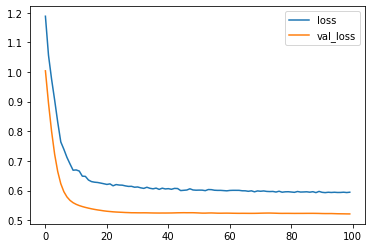

In [159]:
losses.plot()

In [163]:
y_hat = model.predict(X_test)

In [164]:
mean_absolute_error(y_test,y_hat)

0.541723015686012

In [165]:
mean_squared_error(y_test, y_hat)

0.5210876421954738

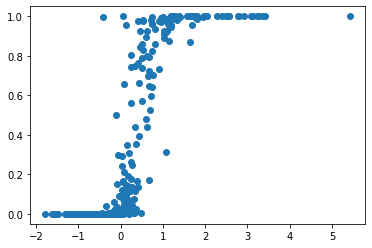

In [185]:
# Predicted values vs Actual Values
plt.scatter(y_test, y_hat)

In [189]:
entry_field = data.drop('SalePrice', axis=1).iloc[0]
entry_field

MSSubClass         60
MSZoning           RL
LotFrontage        65
LotArea          8450
Street              1
                 ... 
MiscVal             0
MoSold              2
YrSold           2008
SaleType            8
SaleCondition       4
Name: 0, Length: 75, dtype: object

In [195]:
model.predict(entry_field.values.reshape(1,75))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.int64).